# Import

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Code

In [6]:
fashion = keras.datasets.fashion_mnist

In [7]:
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
imgIndex = 9
image = xtrain[imgIndex]

In [9]:
print("Image Label :",ytrain[imgIndex])

Image Label : 5


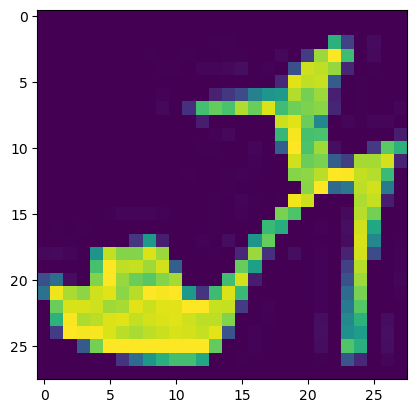

In [10]:
plt.imshow(image)

In [12]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [15]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

history = model.fit(xtrain, ytrain, epochs= 40, validation_data=(xvalid,yvalid))


Epoch 1/40


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7411 - accuracy: 0.7566 - val_loss: 0.5445 - val_accuracy: 0.8136
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4927 - accuracy: 0.8286 - val_loss: 0.4398 - val_accuracy: 0.8522
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4453 - accuracy: 0.8437 - val_loss: 0.4303 - val_accuracy: 0.8472
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4180 - accuracy: 0.8525 - val_loss: 0.3957 - val_accuracy: 0.8638
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3991 - accuracy: 0.8599 - val_loss: 0.3814 - val_accuracy: 0.8696
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3805 - accuracy: 0.8661 - val_loss: 0.3920 - val_accuracy: 0.8642
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8708 - val_loss: 0.3957 - val_accura

In [25]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


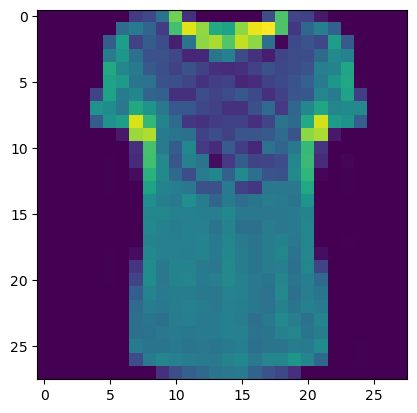

In [29]:
plt.imshow(xtrain[1])

In [26]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[9 2 1 1 0]
